<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series EDA

_Author: Unknown_

----
This lab will walk you through performing exploratory data analysis on a dataset of weekly chickenpox cases from Hungary. This dataset is from the UCI Machine Learning Repository. You can read more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Hungarian+Chickenpox+Cases).

-----

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Only using one county
pox = pd.read_csv('data/hungary_chickenpox.csv')[['Date', 'BUDAPEST']]

# Renaming columns for readability
pox.columns = ['date', 'budapest_cases']
pox.head(3)

,date,budapest_cases
0,03/01/2005,168
1,10/01/2005,157
2,17/01/2005,96


**Check the dataframe dtypes**

In [3]:
pox.dtypes

# 'date' variabel is now object type.

date              object
budapest_cases     int64
dtype: object

**Check for nulls**

In [4]:
pox.isnull().sum()

# No null values contain in data.

date              0
budapest_cases    0
dtype: int64

**Casting the `'Date'` column to a datetime type**

Use `pd.to_datetime` to convert the `Date` column to a datetime.

**WARNING**: The date column is formated as day-month-year. Does `pd.to_datetime` work the way you expect it to on day/month/year strings? If it doesn't work the way you expect it to, check [the documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) for `pd.to_datetime`, and see if one of the settings fixes things.

In [5]:
pox['date'] = pd.to_datetime(pox['date'], dayfirst=True)

In [6]:
# Check result
pox.head()

,date,budapest_cases
0,2005-01-03,168
1,2005-01-10,157
2,2005-01-17,96
3,2005-01-24,163
4,2005-01-31,122


In [7]:
# Check dtypes
pox.dtypes

date              datetime64[ns]
budapest_cases             int64
dtype: object

**Set the `'Date'` column to be the index**

In [8]:
pox.set_index('date', inplace=True)

In [9]:
pox.head()

,budapest_cases
date,
2005-01-03,168
2005-01-10,157
2005-01-17,96
2005-01-24,163
2005-01-31,122


---

Now that our data is formatted appropriately, we can embark on EDA.

### Summary statistics

**What times does the dataset describe?**

That is, what's the earliest date in the dataset, and what's the latest date?

In [10]:
print('Earliest day:', pox.index.min())
print('Latest day:', pox.index.max())

Earliest day: 2005-01-03 00:00:00
Latest day: 2014-12-29 00:00:00


**Plot a histogram of the Budapest cases column**

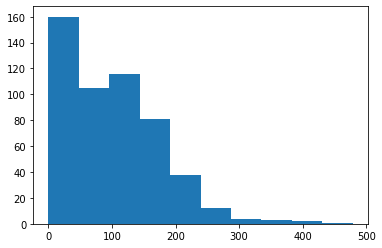

In [11]:
plt.hist(pox['budapest_cases']);

## 'budapest_cases' seems to have right skew looking from its histogram.

**How many cases were there per year?**

Recall that with time series data, we can't simply group by on the year. You'll need to use the `resample` method on the DataFrame to answer this question.

In [12]:
pox.resample('Y').sum()

# There are around 4,000 - 6,000 cases per year

,budapest_cases
date,
2005-12-31,4562
2006-12-31,6498
2007-12-31,6311
2008-12-31,4441
2009-12-31,5527
2010-12-31,5222
2011-12-31,5404
2012-12-31,5353
2013-12-31,5157


### Visualizations

**Make a line plot of chickenpox cases**

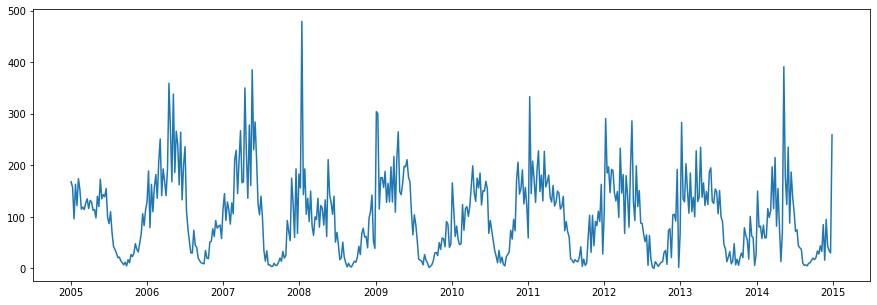

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(pox);

# From visulization, the data look station but with seasonality.

**In short answer format, describe any apparent trends**

In [14]:
# The data look station but with seasonality.

### Plot rolling averages

Plot the weekly chickenpox cases, but on the same graph, also plot the 4-week and 12-week rolling averages.

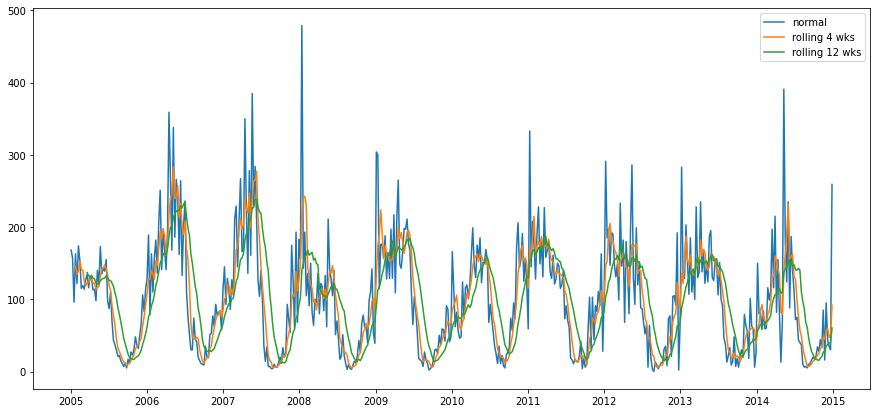

In [15]:
plt.figure(figsize=(15, 7))
plt.plot(pox, label='normal')
plt.plot(pox.rolling(4).mean(), label='rolling 4 wks')
plt.plot(pox.rolling(12).mean(), label='rolling 12 wks')
plt.legend();

### Plot yearly chickenpox cases

You may need to use `resample` again for this.

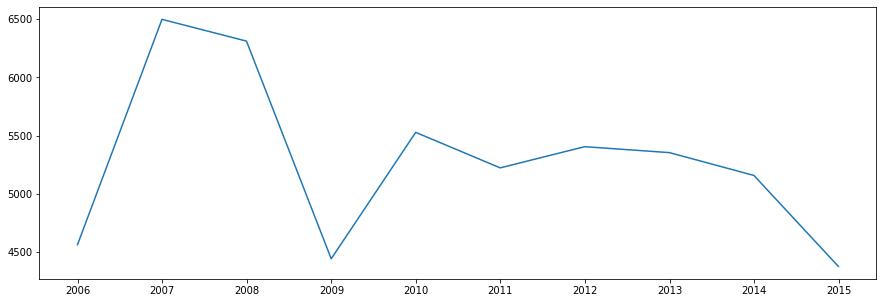

In [16]:
plt.figure(figsize=(15, 5))
plt.plot(pox.resample('Y').sum());